# Analiza statystyczna wyborów
Analiza zmienności poparcia w powiatach  
Norbert Gwiazda

Na potrzeby analizy statystycznej wyborów przeprowadzimy analizę zmienności poparcia w powiatach. Sprawdzimy, czy są jakieś czynniki, które wpływają na dużo większą zmienność poparcia w powiatach, czy też nic takiego nie ma.

Współczynnik zmienności poparcia w powiecie będzie liczony jako znormalizowana suma różnic poparcia w analizowanym szeregu czasowym.

$$ A = \{a_1, a_2, a_3, \dotsc\} $$
Zbiór $A$ jest uszeregowanym czasowo zbiorem poparć partii politycznej w powiecie.
$$ b_i = a_{i+1} - a_i $$
$$ B = \{b_1, b_2, b_3, \dotsc \}$$
Zbiór $B$ będzie z kolei zbiorem różnic między kolejnymi parami elementów zbioru $A$
Aby obliczyć współczynnik zmienności dla pojedynczej partii użyjemy następującego wzoru:
$$ \gamma_{partii} = \displaystyle\sum_{x\in B} |x| $$
Wynika z tego, że każdy powiat będzie składał się ze zbioru $P$, zawierającym współczynniki zmienności kolejnych partii politycznych:
$$ P = \{\gamma_{partii_1}, \gamma_{partii_2}, \gamma_{partii_3}, \dotsc \} $$
Do obliczenia właściwego współczynnika użyjemy następujących wzorów:
$$ \gamma = \displaystyle\sum_{x\in P} x $$
$$ \gamma_{normalized} = \frac{\gamma - \min{\gamma}}{\max{\gamma}-\min{\gamma}} $$

Dlaczego nie użyjemy do tego chociażby miary odchylenia standardowego? Nasz wyliczony współczynnik uwzględnia zmienność poparcia w czasie, a więc to jak poparcie zmieniało się z wyborów na wybory, podczas gdy miara $\sigma$ odchylenia standardowego tę samą zmienność określałaby jako odchylenie względem średniej z pominięciem czasu.

### Część 1. - Załadowanie danych

In [159]:
## Import bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Percentualization import percentualize_dataframe
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
df = pd.read_csv('Dane/Wyniki.csv', sep=';')
gdf = gpd.read_file('Dane/skorygowane_powiaty.geojson', engine='pyogrio').drop(columns=['id'])

In [161]:
df0 = percentualize_dataframe(df)

In [162]:
print(df0['Data'].unique())
df0 = df0.sort_values(by=['Kod', 'Data']).reset_index(drop=True)
print(df0.head())

df3 = df0[df0['Typ wyborów'] != 'Samorządowe']

['2023-10-15' '2020-06-28' '2019-10-13' '2018-06-30' '2024-04-07'
 '2024-06-09']
      Kod  Trzecia Droga    Lewica  Prawo i Sprawiedliwość  Konfederacja  \
0  201000       0.035880  0.060328                0.242071      0.028704   
1  201000       0.072097  0.176653                0.424431      0.067284   
2  201000       0.179335  0.020763                0.415572      0.067235   
3  201000       0.117395  0.091163                0.340047      0.075309   
4  201000       0.138834  0.062148                0.262578      0.055612   

   Koalicja Obywatelska        Data   Typ wyborów  Frekwencja  
0              0.093198  2018-06-30   Samorządowe    0.512011  
1              0.205245  2019-10-13       Sejmowe    0.558743  
2              0.310272  2020-06-28  Prezydenckie    0.600899  
3              0.315068  2023-10-15       Sejmowe    0.700515  
4              0.174672  2024-04-07   Samorządowe    0.481394  


In [163]:
df_pre = df0[df0.columns[0:7]]
df_pre2 = df3[df3.columns[0:7]]

In [164]:
def process_group(group):
    group = group.sort_values(by='Data').reset_index(drop=True).drop(columns='Data')
    diff = abs(group.diff()).sum(axis=0)  # Liczymy różnice bezwzględne, potem sumujemy po kolumnach
    return diff

In [165]:
df_grouped = df_pre.groupby('Kod')[df_pre.columns[1:]].apply(process_group)
# 3. Sumowanie sum różnic w obrębie każdej grupy (grupa 'Kod')
df2 = df_grouped.sum(axis=1).reset_index()
df2.columns = ['Kod', 'Zmienność ogółem']
# Zobacz wynik
print(df2)

         Kod  Zmienność ogółem
0     201000          1.843914
1     202000          0.911815
2     203000          1.084492
3     204000          1.386703
4     205000          1.249073
..       ...               ...
375  3217000          0.948304
376  3218000          1.147704
377  3261000          1.083419
378  3262000          0.939708
379  3263000          1.664776

[380 rows x 2 columns]


In [166]:
df_grouped = df_pre2.groupby('Kod')[df_pre2.columns[1:]].apply(process_group)

df3 = df_grouped.sum(axis=1).reset_index()
df3.columns = ['Kod', 'Zmienność bez samorządowych']
print(df3)

         Kod  Zmienność bez samorządowych
0     201000                     0.834712
1     202000                     0.582695
2     203000                     0.697117
3     204000                     0.692124
4     205000                     0.686034
..       ...                          ...
375  3217000                     0.639975
376  3218000                     0.675156
377  3261000                     0.645862
378  3262000                     0.624266
379  3263000                     0.927680

[380 rows x 2 columns]


In [167]:
df2 = df2.merge(df3, on='Kod')
print(df2)

         Kod  Zmienność ogółem  Zmienność bez samorządowych
0     201000          1.843914                     0.834712
1     202000          0.911815                     0.582695
2     203000          1.084492                     0.697117
3     204000          1.386703                     0.692124
4     205000          1.249073                     0.686034
..       ...               ...                          ...
375  3217000          0.948304                     0.639975
376  3218000          1.147704                     0.675156
377  3261000          1.083419                     0.645862
378  3262000          0.939708                     0.624266
379  3263000          1.664776                     0.927680

[380 rows x 3 columns]


In [168]:
def dodaj_nazwy(data):
    data['Nazwa'] = ''
    for i in range(data.shape[0]):
        kod = data.loc[i, 'Kod']
        row = gdf[gdf['kod']==kod]

        if not row.empty: 
            nazwa = row['nazwa'].values[0]  
            data.loc[i, 'Nazwa'] = nazwa
    return data

In [169]:
sc1 = MinMaxScaler()
df2['Zmienność ogółem'] = sc1.fit_transform(df2[['Zmienność ogółem']])

sc2 = MinMaxScaler()
df2['Zmienność bez samorządowych'] = sc2.fit_transform(df2[['Zmienność bez samorządowych']])


In [170]:
gdf0 = gdf.drop(columns=['nazwa'])
gdf0 = gdf0.merge(df2, left_on='kod', right_on='Kod')
gdf0 = dodaj_nazwy(gdf0)
print(gdf0.head())

       kod                                           geometry      Kod  \
0  1815000  MULTIPOLYGON (((21.6943 50.1785, 21.6944 50.17...  1815000   
1  1410000  MULTIPOLYGON (((22.7238 52.2804, 22.7238 52.28...  1410000   
2  1418000  MULTIPOLYGON (((21.1101 52.1132, 21.1088 52.11...  1418000   
3  1425000  MULTIPOLYGON (((20.9891 51.4895, 20.9892 51.48...  1425000   
4  1427000  MULTIPOLYGON (((19.5088 52.8678, 19.5087 52.86...  1427000   

   Zmienność ogółem  Zmienność bez samorządowych                   Nazwa  
0          0.080776                     0.050616  ropczycko-sędziszowski  
1          0.672990                     0.079846                 łosicki  
2          0.122892                     0.267470            piaseczyński  
3          0.118431                     0.081258                radomski  
4          0.895809                     0.240607               sierpecki  


### Część 2. - Analiza zmienności na mapach

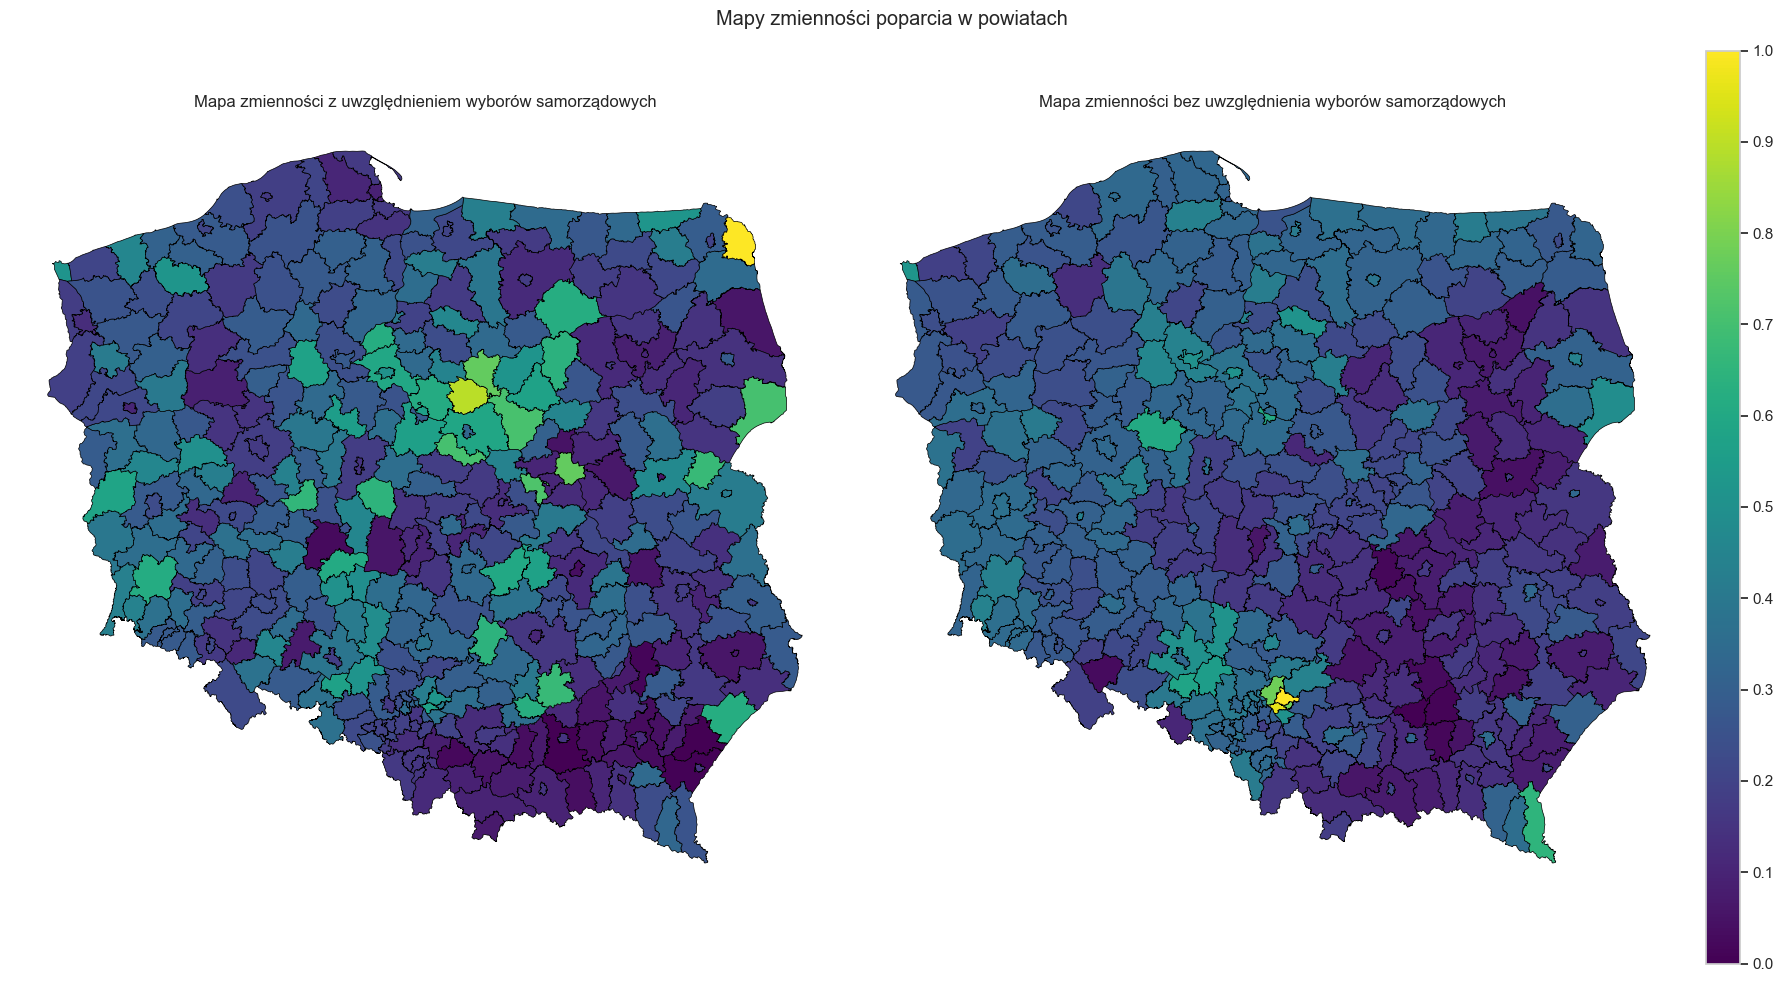

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10), gridspec_kw={'width_ratios': [0.49, 0.49, 0.02]})
sns.set_theme(style='whitegrid')

fig.suptitle('Mapy zmienności poparcia w powiatach')


gdf0.plot(column='Zmienność ogółem', cmap='viridis', linewidth=0.5, edgecolor='black',
         legend=False, ax=axes[0])
axes[0].set_title('Mapa zmienności z uwzględnieniem wyborów samorządowych')


gdf0.plot(column='Zmienność bez samorządowych', cmap='viridis', linewidth=0.5, edgecolor='black',
         legend=False, ax=axes[1])
axes[1].set_title('Mapa zmienności bez uwzględnienia wyborów samorządowych')


for ax in axes[:2]:
    ax.axis('off')

sm=plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []

cbar = fig.colorbar(sm, cax=axes[2])

cbar.set_ticks(np.linspace(start=0, stop=1, num=11))

plt.tight_layout()
plt.show()

<table style='table-layout: fixed;'>
<tr>
<th>Z wyborami samorządowymi</th>
<th>Bez wyborów samorządowych</th>
</tr>
<tr>
<td style='width:50%;'>
<ul>
<li>Bardzo silna zmienność w pojedynczym powiecie sejneńskim</li>
<li>Spora zmienność na północno-zachodnim Mazowszu w Płocko-Ciechanowskim (Powiaty: sierpecki, żuromiński, ciechanowski, przasnyski, płocki, gostyninski, Płock, sochaczewski)</li>
<li>Umiarkowana zmienność na południowych Kujawach (powiaty lipnowski i włocławski), w Toruniu i Chełmnie, w południowym świętokrzyskim (powiaty: buski, kazimierski, włoszczowski oraz w powiecie Lubaczowskim)
<li>Minimalna zmienność, w zachodnim łódzkim, w Małopolsce, na Podkarpaciu, w Sokółce i warszawskim obwarzanku.
</ul>
</td>
<td>
<ul>
<li>Bardzo silna zmienność w *Zagłębiu Dąbrowskim* (Będzin, Sosnowiec, Jaworzno, Dąbrowa Górnicza)</li>
<li>Umiarkowana zmienność w *Bieszczadach*, Hajnówce, Gnieźnie i wschodnim opolskim.
<li>Minimalna zmienność w świętokrzyskim, Małopolsce, Lubelskim, wschodnim Mazowszu i na *ziemi łomżyńskiej*</li>
</ul>
</td>
</tr>
</table>

Powyższe mapy dowodzą ogromnego wpływu typu wyborów na rozkład poparcia. Wybory lokalne angażują odmienne grupy wyborców i często wyłamują się ze schematu głosowania tylko na „naszych”. Konkluzja ta zmusza nas do podjęcia innej strategi opisu zmienności poparcia w powiatach. Analiza zostanie przeprowadzona w następujący sposób: 
- Do policzonej osobno zmienności z wyłączeniem wyborów samorządowych, obliczona zostanie również i zmienność wyłącznie względem kolejnych wyborów lokalnych.
- Obie zmienności zostaną zsumowane, dając nam wartość skumulowaną zmienności. 

Naturalnym pytaniem, które może się pojawić jest, to czy skoro już oddzieliliśmy wybory samorządowe od siebie, to czy tak samo nie powinniśmy postąpić z innymi typami wyborów (prezydenckimi, sejmowymi i europejskimi)? Każde z tych wyborów mają nieco inną specyfikę, ale nie różnią się tak diametralnie od wyborów lokalnych, w których znacznie częściej niż na listę, głos swój oddaje się na znanego wójta albo lokalnego samorządowca.

In [172]:
df4 = df0[df0['Typ wyborów'] == 'Samorządowe']
df_pre2 = df4[df4.columns[0:7]]
df_grouped = df_pre2.groupby('Kod')[df_pre.columns[1:]].apply(process_group)
# 3. Sumowanie sum różnic w obrębie każdej grupy (grupa 'Kod')
df4 = df_grouped.sum(axis=1).reset_index()
df4.columns = ['Kod', 'Zmienność w samorządowych']
# Zobacz wynik
print(df4)

         Kod  Zmienność w samorządowych
0     201000                   0.233662
1     202000                   0.204271
2     203000                   0.212044
3     204000                   0.189735
4     205000                   0.222497
..       ...                        ...
375  3217000                   0.082176
376  3218000                   0.452476
377  3261000                   0.128648
378  3262000                   0.187628
379  3263000                   0.524298

[380 rows x 2 columns]


In [173]:
df_zmiennosc = df3.merge(df4, on='Kod')
df_zmiennosc['Skumulowana zmienność'] = df_zmiennosc['Zmienność bez samorządowych'] + df_zmiennosc['Zmienność w samorządowych']
df_zmiennosc = df_zmiennosc.drop(columns=['Zmienność bez samorządowych', 'Zmienność w samorządowych'])
print(df_zmiennosc.head())

      Kod  Skumulowana zmienność
0  201000               1.068374
1  202000               0.786966
2  203000               0.909161
3  204000               0.881858
4  205000               0.908531


In [174]:
sc = MinMaxScaler()
df_zmiennosc['Skumulowana zmienność'] = sc.fit_transform(df_zmiennosc[['Skumulowana zmienność']])
print(df_zmiennosc.head())

      Kod  Skumulowana zmienność
0  201000               0.454714
1  202000               0.237667
2  203000               0.331915
3  204000               0.310857
4  205000               0.331429


In [175]:
del df, df_pre, df_pre2, df2, df3, df4

Aby zaoszczędzić miejsca, usuniemy nieużywane zmienne.

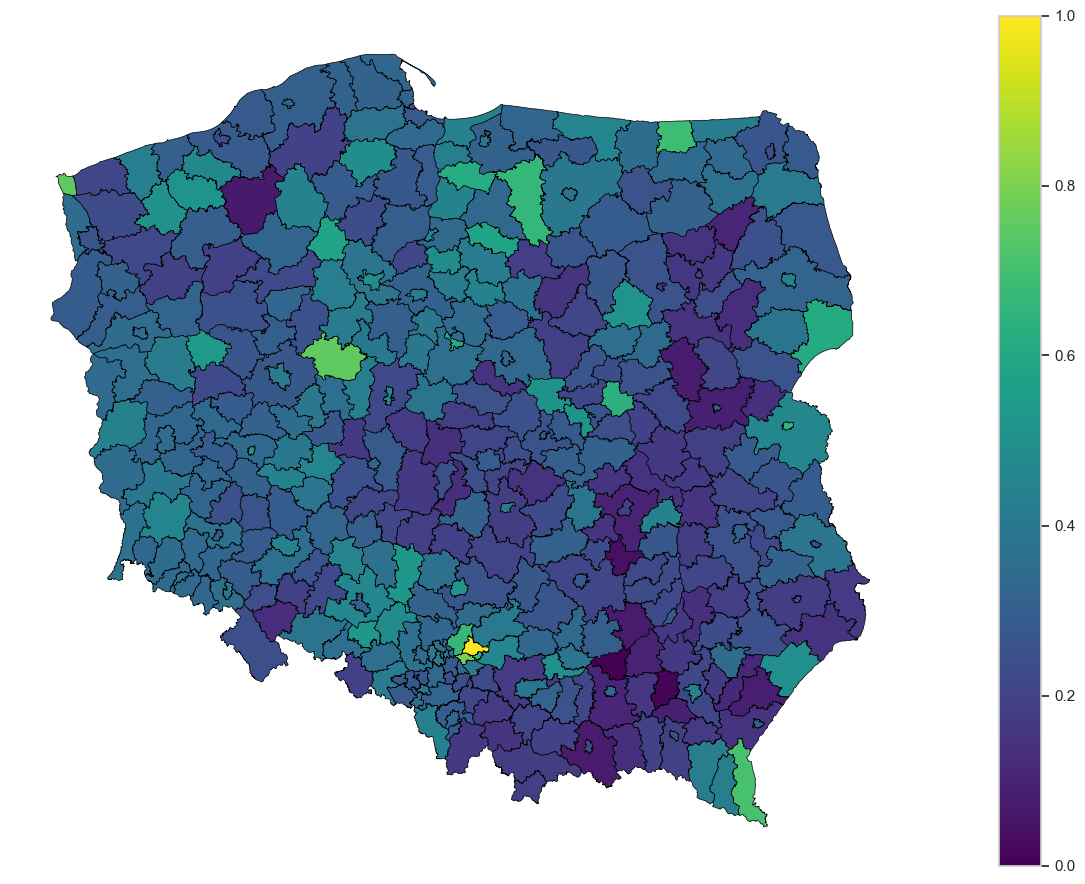

In [176]:
fig, ax = plt.subplots(figsize=(18,9))
sns.set_theme(style='whitegrid')

gdf0 = gdf.merge(df_zmiennosc, left_on='kod', right_on='Kod').drop(columns=['kod', 'nazwa'])

gdf0.plot(column='Skumulowana zmienność', cmap='viridis', linewidth=0.5, edgecolor='black',
         legend=True, ax=ax)
ax.axis('off')

plt.tight_layout()
plt.show()

Powyższa mapa ukazuje skumulowane poparcie. Wyczytać możemy z niego, że najsilniejszą zmiennością charakteryzuje się Dąbrowa Górnicza w *Zagłębiu Dąbrowskim*. Silna zmienność pozostaje w powiatach: ostródzkim, kętrzyńskim, hajnowskim, bieszczadzkim, gnieźnieńskim, Włocławku, Świnoujściu i Warszawie.

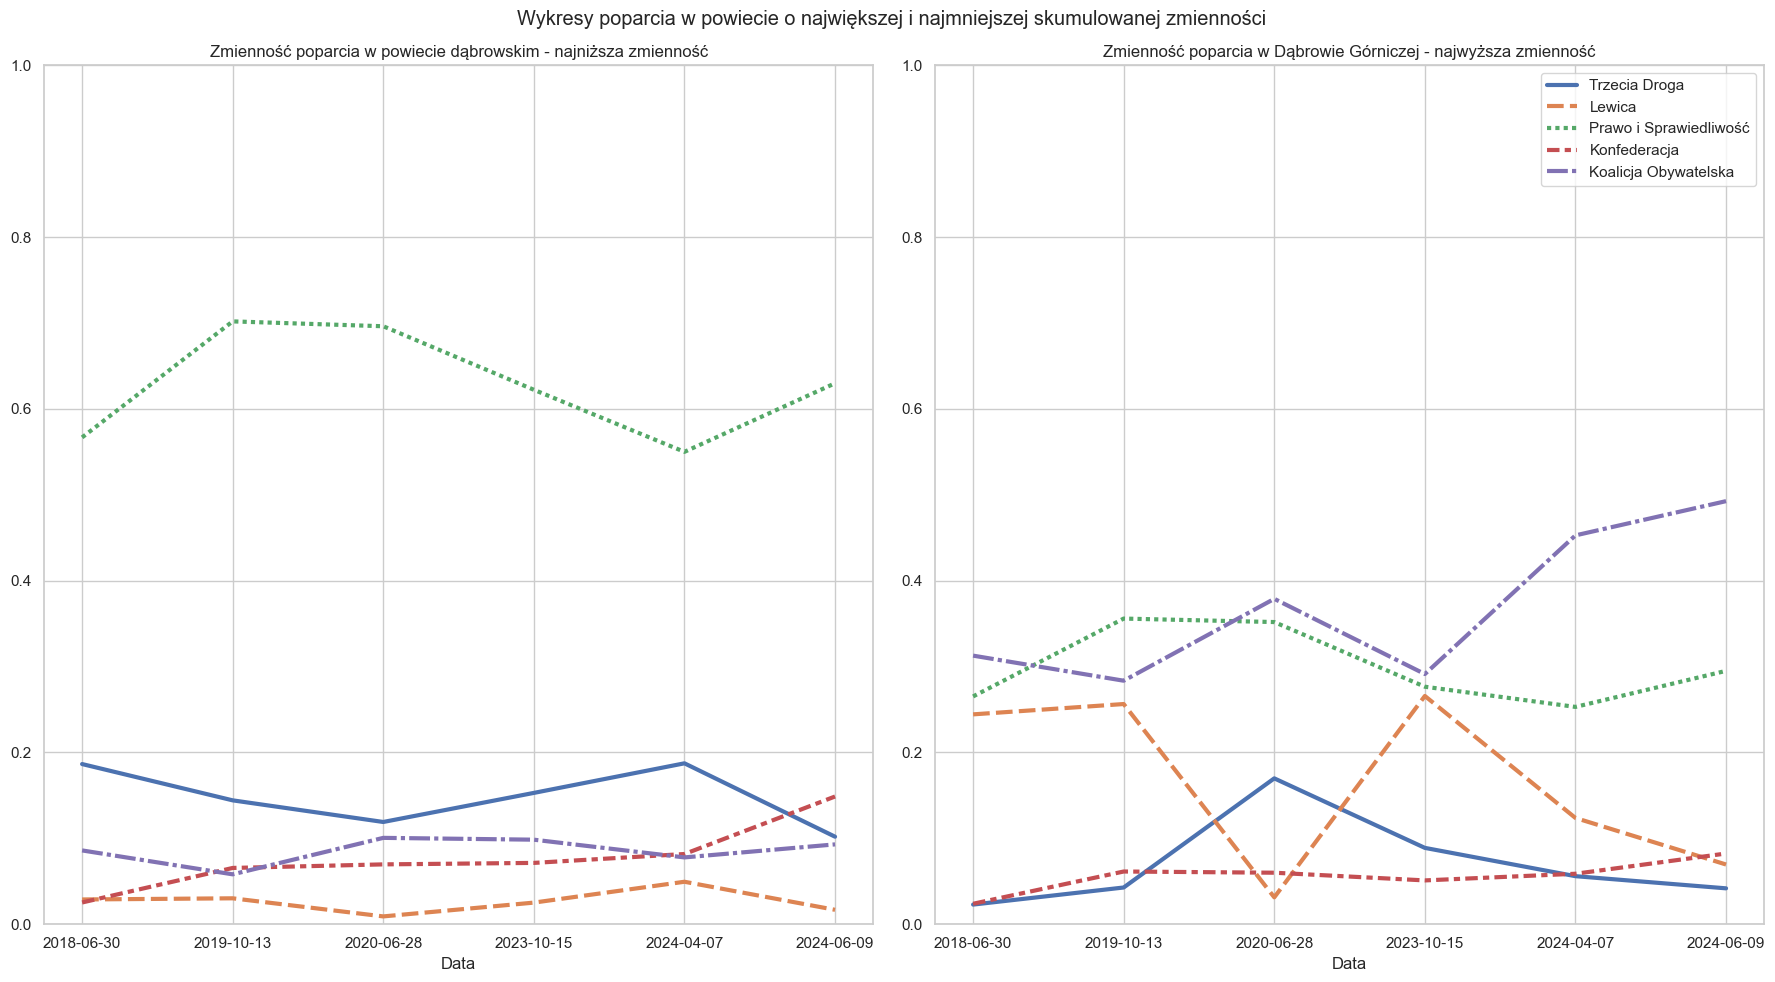

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.set_theme(style='whitegrid')

fig.suptitle('Wykresy poparcia w powiecie o największej i najmniejszej skumulowanej zmienności')
df1 = df0[df0['Kod'] == 1204000].set_index('Data', drop=True)
axes[0].set_title('Zmienność poparcia w powiecie dąbrowskim - najniższa zmienność')
sns.lineplot(df1[df1.columns[1:7]], linewidth='3', ax=axes[0], legend=False)
df1 = df0[df0['Kod'] == 2465000].set_index('Data', drop=True)
axes[1].set_title('Zmienność poparcia w Dąbrowie Górniczej - najwyższa zmienność')
sns.lineplot(df1[df1.columns[1:7]], linewidth='3', ax=axes[1])

for ax in axes:
    ax.set_ylim([0,1])

plt.tight_layout()
plt.show()

Powyższe wykresy udowadniają, że przyjęty przeze mnie skumulowany współczynnik zmienności poparcia ma realne przełożenie na zmienność. Dalszą analizę rozszerzę o badanie korelacji między współczynnikiem, a różnymi innymi cechami powiatów.

### Część 3. - Analiza korelacji zmienności poparcia do różnych cech powiatów